In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

SINGLE FILAMENT DYNAMICS

Text(0.5, 1.0, 'Len_distribution')

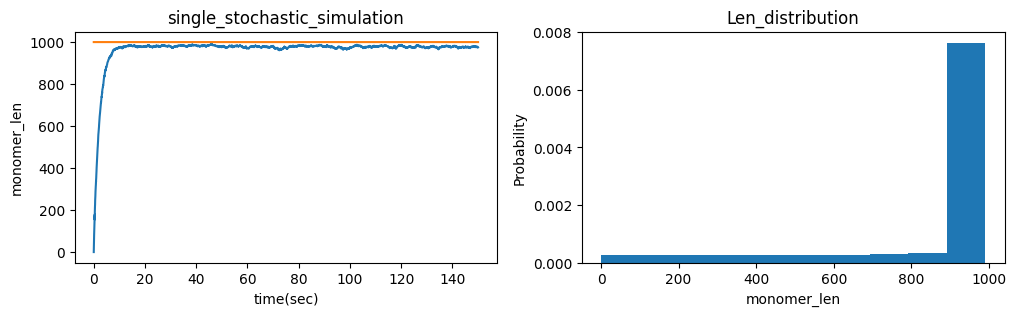

In [2]:
def DBG_M1():
    P=0
    N=1000
    kp,kn=0.5,10
    y_DG=np.array([P,N])
    t=0
    P_n,N_n,t_n=[P],[N],[0]
    Total_N=[y_DG[0]+y_DG[1]]
    while(t<150):
        # y_DG=np.array([P,N])
        k1,k2=kn,kp*(y_DG[1])*1
        a=np.array([k1,k2])
        a_tot=np.sum(a)
        
        r1=np.random.rand()
        dt=-np.log(r1)/a_tot
        t=t+dt
        t_n.append(t)
        # print(t)
        
        r2=np.random.rand()
        count=0
        sum=0
        tr_m=np.array([[-1,1],[1,-1]])
        
        for i in range(0,len(a)):
            sum=sum+a[i]
            if(sum>a_tot*r2):
                break
            count=count+1    
        y_DG=y_DG+tr_m[count]
        P_n.append(y_DG[0])
        N_n.append(y_DG[1])
        Total_N.append(y_DG[0]+y_DG[1])
    return(P_n,N_n,t_n,Total_N)


P,N,t,Tot_N=DBG_M1()
fig,ax=plt.subplots(ncols=2,figsize=(12,3))
ax[0].plot(t,P)
ax[0].plot(t,Tot_N)
ax[0].set_xlabel('time(sec)')
ax[0].set_ylabel('monomer_len')
ax[0].set_title('single_stochastic_simulation')
ax[1].hist(P,density=True)
ax[1].set_xlabel('monomer_len')
ax[1].set_ylabel('Probability')
ax[1].set_title('Len_distribution')



In [29]:
nTraj = 100
nInterp = 1000
tmax=150
ts = np.linspace(0,tmax,nInterp)
# Ltraj = np.zeros((nTraj,nInterp))
Ptraj = np.zeros((nTraj,nInterp))
Ntraj =np.zeros((nTraj,nInterp))

for i in range(nTraj):
    P,N,t,N_tot=DBG_M1()
    P1 = np.interp(ts,t,P)
    N1 = np.interp(ts,t,N)
    Ptraj[i,] = P1
    Ntraj[i,] = N1 


Text(0.5, 1.0, 'Len_distribution')

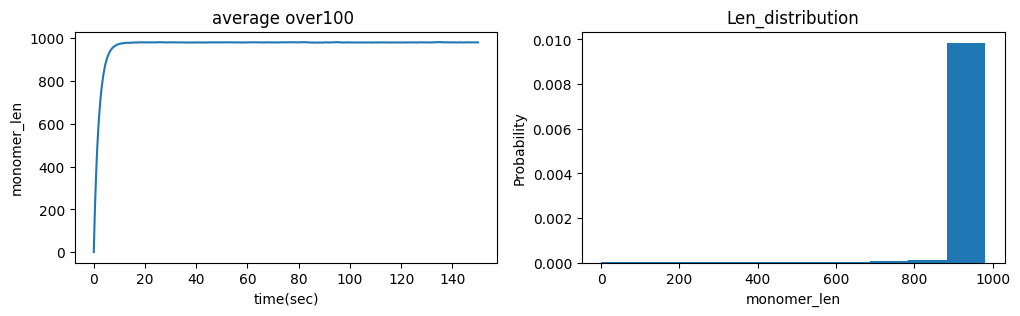

In [30]:
P_mean=np.mean(Ptraj,axis=0)
fig,ax=plt.subplots(ncols=2,figsize=(12,3))
ax[0].plot(ts,P_mean)
ax[0].set_xlabel('time(sec)')
ax[0].set_ylabel('monomer_len')
ax[0].set_title(f'average over{nTraj} ')
ax[1].hist(P_mean,density=True)
ax[1].set_xlabel('monomer_len')
ax[1].set_ylabel('Probability')
ax[1].set_title('Len_distribution')



[3, 7]


In [ ]:
TWO EQUIVALENT FILAMENTS

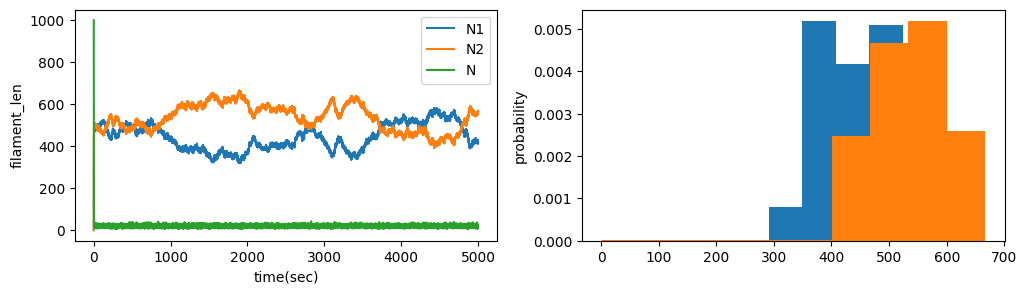

In [21]:

def DBG_M2():
    N=1000
    P1,P2=0,0
    kp1,kp2,kn=0.5,0.5,10
    y_DG=np.array([P1,P2,N])
    t,step=0,0
    P1_n,P2_n,N_n,t_n=[P1],[P2],[N],[0]
    h_data=[]
    
    while(t<5000):
        k1,k2,k3=kn,kp1*(y_DG[2]),kp2*(y_DG[2])
        a=[k1,k1,k2,k3]
        tr_m=np.array([[-1,0,1],[0,-1,1],[1,0,-1],[0,1,-1]])
        if(y_DG[0]<0):
            a.pop(0)
            tr_m=np.delete(tr_m,0,axis=0)

        elif(y_DG[1]<0):
            a.pop(1)
            tr_m=np.delete(tr_m,1,axis=0)  

        elif(y_DG[2]<0):
            a.pop([2,3])
            tr_m= np.delete(tr_m,[2,3],axis=0) 

        if(step%50000==0):
            P1=np.array(P1_n)
            h_data.append(P1)
            
        step=step+1
        r1=np.random.rand()
        r2=np.random.rand()
        a_tot=np.sum(a)
        dt=-np.log(r1)/a_tot

        count,s=0,0
        for i in range(0,len(a)):
            s=s+a[i]
            if(s>r2*a_tot):
                break
            count=count+1    
      
        y_DG=y_DG+tr_m[count]
        P1_n.append(y_DG[0])
        P2_n.append(y_DG[1])
        N_n.append(y_DG[2])
        
        t=t+dt
        t_n.append(t)       
    return[P1_n,P2_n,N_n,t_n,h_data]
        


P1,P2,N_n,t,h_data=DBG_M2()
fig,ax= plt.subplots(ncols=2,figsize=(12,3))

ax[0].plot(t,P1,label='N1')
ax[0].plot(t,P2,label='N2')
ax[0].plot(t,N_n,label='N')
ax[0].legend()
ax[0].set_xlabel('time(sec)')
ax[0].set_ylabel('filament_len')
ax[0].set_title(f'Two identical nucleation sites')


ax[1].hist(P1,density=True)
ax[1].hist(P2,density=True)
ax[1].set_ylabel('probability')
plt.show()




In [24]:
nTraj = 50
nInterp = 100
tmax=5000
ts = np.linspace(0,tmax,nInterp)
# Ltraj = np.zeros((nTraj,nInterp))
Ptraj1 = np.zeros((nTraj,nInterp))
Ptraj2 = np.zeros((nTraj,nInterp))
Ntraj =np.zeros((nTraj,nInterp))

for i in range(nTraj):
    print(i)
    P1,P2,N_n,t,h_data=DBG_M2()
    P1n = np.interp(ts,t,P1)
    P2n = np.interp(ts,t,P2)
    Ptraj1[i,] = P1n
    Ptraj2[i,] = P2n
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


Text(0, 0.5, 'probability')

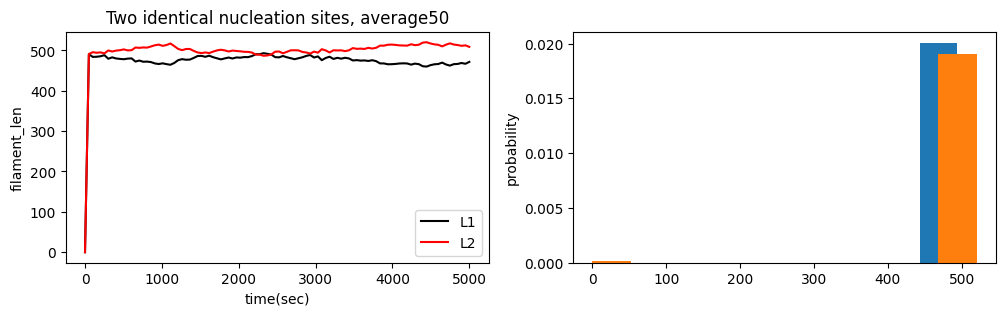

In [25]:
P1_mean=np.mean(Ptraj1,axis=0)
P2_mean=np.mean(Ptraj2,axis=0)

fig,ax= plt.subplots(ncols=2,figsize=(12,3))
ax[0].plot(ts,P1_mean,'black',label='L1')
ax[0].plot(ts,P2_mean,'red',label='L2')
ax[0].legend()
ax[0].set_xlabel('time(sec)')
ax[0].set_ylabel('filament_len')
ax[0].set_title(f'Two identical nucleation sites, average{nTraj}')


ax[1].hist(P1_mean,density=True)
ax[1].hist(P2_mean,density=True)
ax[1].set_ylabel('probability')





TWO DISTINCT NUCLEATION SITES

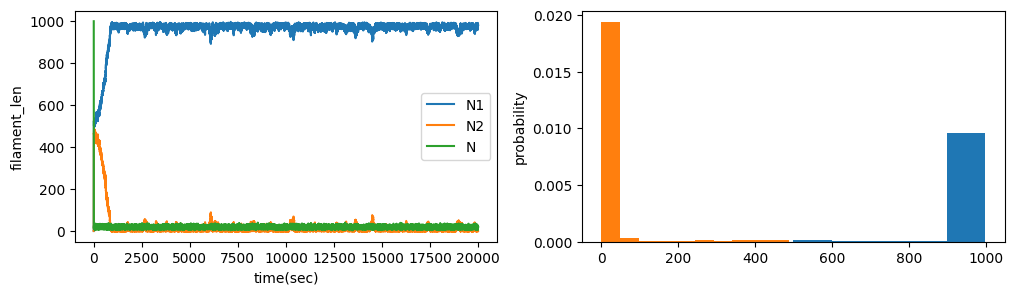

In [41]:

def DBG_M3():
    N=1000
    P1,P2=0,0
    kp1,kp2,kn=0.55,0.5,10
    y_DG=np.array([P1,P2,N])
    t=0
    P1_n,P2_n,N_n,t_n=[P1],[P2],[N],[0]

    
    while(t<20000):
        k1,k2,k3=kn,kp1*(y_DG[2]),kp2*(y_DG[2])
        a=[k1,k1,k2,k3]
        tr_m=np.array([[-1,0,1],[0,-1,1],[1,0,-1],[0,1,-1]])
        if(y_DG[0]<0):
            a.pop(0)
            tr_m=np.delete(tr_m,0,axis=0)

        elif(y_DG[1]<0):
            a.pop(1)
            tr_m=np.delete(tr_m,1,axis=0)  

        elif(y_DG[2]<0):
            a.pop([2,3])
            tr_m= np.delete(tr_m,[2,3],axis=0) 


        r1=np.random.rand()
        r2=np.random.rand()
        a_tot=np.sum(a)
        dt=-np.log(r1)/a_tot

        count,s=0,0
        for i in range(0,len(a)):
            s=s+a[i]
            if(s>r2*a_tot):
                break
            count=count+1    
      
        y_DG=y_DG+tr_m[count]
        P1_n.append(y_DG[0])
        P2_n.append(y_DG[1])
        N_n.append(y_DG[2])
        
        t=t+dt
        t_n.append(t)   
    return[P1_n,P2_n,N_n,t_n]
        


P1,P2,N_n,t=DBG_M3()
fig,ax= plt.subplots(ncols=2,figsize=(12,3))

ax[0].plot(t,P1,label='N1')
ax[0].plot(t,P2,label='N2')
ax[0].plot(t,N_n,label='N')
ax[0].legend()
ax[0].set_xlabel('time(sec)')
ax[0].set_ylabel('filament_len')

ax[1].hist(P1,density=True)
ax[1].hist(P2,density=True)
ax[1].set_ylabel('probability')
plt.show()




In [42]:
nTraj = 10
nInterp = 100
tmax=20000
ts = np.linspace(0,tmax,nInterp)
# Ltraj = np.zeros((nTraj,nInterp))
Ptraj1 = np.zeros((nTraj,nInterp))
Ptraj2 = np.zeros((nTraj,nInterp))
Ntraj =np.zeros((nTraj,nInterp))

for i in range(nTraj):
    print(i)
    P1,P2,N_n,t=DBG_M3()
    P1n = np.interp(ts,t,P1)
    P2n = np.interp(ts,t,P2)
    Ptraj1[i,] = P1n
    Ptraj2[i,] = P2n
    

0
1
2
3
4
5
6
7
8
9


Text(0, 0.5, 'probability')

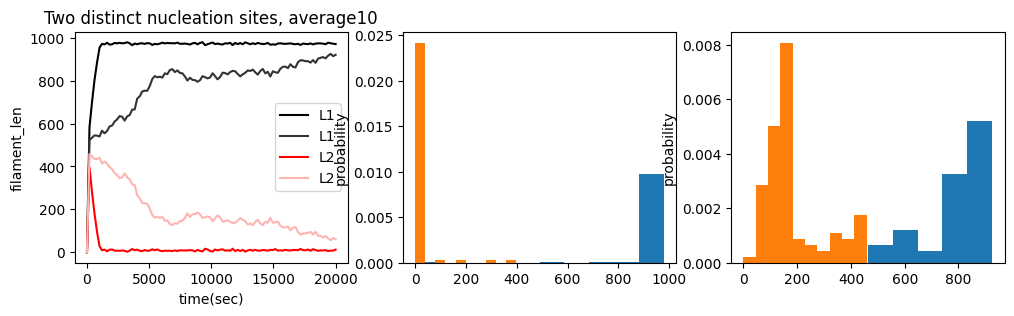

In [53]:
light_red = (1.0, 0.7, 0.7)
light_black = (0.2, 0.2, 0.2)
# P1_mean_1=np.mean(Ptraj1,axis=0)
# P2_mean_1=np.mean(Ptraj2,axis=0)

P1_mean_10=np.mean(Ptraj1,axis=0)
P2_mean_10=np.mean(Ptraj2,axis=0)


fig,ax= plt.subplots(ncols=3,figsize=(12,3))
ax[0].plot(ts,P1_mean_10,'black',label='L1')
ax[0].plot(ts,P1_mean_1,color=light_black,label='L1')

ax[0].plot(ts,P2_mean_10,'red',label='L2')
ax[0].plot(ts,P2_mean_1,color=light_red,label='L2')

ax[0].legend()
ax[0].set_xlabel('time(sec)')
ax[0].set_ylabel('filament_len')
ax[0].set_title(f'Two distinct nucleation sites, average{nTraj}')


ax[1].hist(P1_mean_10,density=True)
ax[1].hist(P2_mean_10,density=True)
ax[1].set_ylabel('probability')

ax[2].hist(P1_mean_1,density=True)
ax[2].hist(P2_mean_1,density=True)
ax[2].set_ylabel('probability')




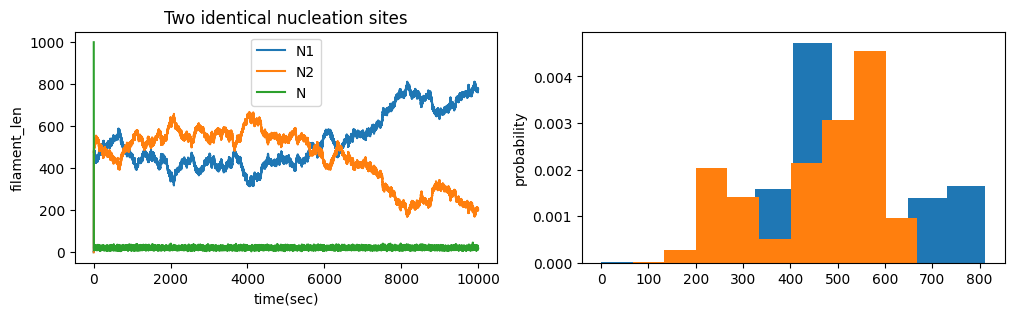

In [3]:

def DBG_M2():
    N=1000
    P1,P2=0,0
    kp1,kp2,kn=0.5,0.5,10
    y_DG=np.array([P1,P2,N])
    t,step=0,0
    P1_n,P2_n,N_n,t_n=[P1],[P2],[N],[0]
    h_data=[]
    
    while(t<10000):
        k1,k2,k3=kn,kp1*(y_DG[2]),kp2*(y_DG[2])
        a=[k1,k1,k2,k3]
        tr_m=np.array([[-1,0,1],[0,-1,1],[1,0,-1],[0,1,-1]])
        if(y_DG[0]<0):
            a.pop(0)
            tr_m=np.delete(tr_m,0,axis=0)

        elif(y_DG[1]<0):
            a.pop(1)
            tr_m=np.delete(tr_m,1,axis=0)  

        elif(y_DG[2]<0):
            a.pop([2,3])
            tr_m= np.delete(tr_m,[2,3],axis=0) 

        if(step%50000==0):
            P1=np.array(P1_n)
            h_data.append(P1)
            
        step=step+1
        r1=np.random.rand()
        r2=np.random.rand()
        a_tot=np.sum(a)
        dt=-np.log(r1)/a_tot

        count,s=0,0
        for i in range(0,len(a)):
            s=s+a[i]
            if(s>r2*a_tot):
                break
            count=count+1    
      
        y_DG=y_DG+tr_m[count]
        P1_n.append(y_DG[0])
        P2_n.append(y_DG[1])
        N_n.append(y_DG[2])
        
        t=t+dt
        t_n.append(t)       
    return[P1_n,P2_n,N_n,t_n,h_data]
        


P1,P2,N_n,t,h_data=DBG_M2()
fig,ax= plt.subplots(ncols=2,figsize=(12,3))

ax[0].plot(t,P1,label='N1')
ax[0].plot(t,P2,label='N2')
ax[0].plot(t,N_n,label='N')
ax[0].legend()
ax[0].set_xlabel('time(sec)')
ax[0].set_ylabel('filament_len')
ax[0].set_title(f'Two identical nucleation sites')


ax[1].hist(P1,density=True)
ax[1].hist(P2,density=True)
ax[1].set_ylabel('probability')
plt.show()


